In [77]:
%run func_def.ipynb

imports loaded.

> Pre-Processing func:
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_prob(name, date, df)
    get_win_streak(name, date, df) #return count of recent wins
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )

> Feature Engineering func:
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data) # return fighter & opponent statistics swapped. 
    get_wins(combo, data)
    get_wins_ratio(combo, data)

> outlier_cleaning func:
    set_outlier_detection_model(X_columns, data)

> model_stats_pred_training func:
    set_lower_cases(string)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_xgboost_reg(X_columns, y_columns, data, n=200, learning_rate=0.2, subsample=0.4, max_depth=5)
    set_predictions(model, data, X_columns, y_columns)
    get_mean_percentage_error(act,

SyntaxError: invalid syntax (463756409.py, line 1)

SyntaxError: invalid syntax (463756409.py, line 1)

In [78]:
loc = '../data/'
file = 'data_features.csv'
df = pd.read_csv(loc+file)

try:
    df = df.drop(['str_dif.1'], axis=1)
except:
    pass

df.date = pd.to_datetime(df.date)
print('Data Frame loaded: '+str(df.shape))
df.tail(3)

Data Frame loaded: (6317, 22)


,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
6314,lose,Alberta Cerra Leon,Remco Pardoel,1994-03-11,Open Weight,SUB,Ezekiel Choke,-0.001919,-0.102865,-0.369809,-0.858406,0.009779,-0.004909,0.0,0.017435,0.019013,-0.00263,0.007469,-1.881571,0.007339,0.002734,0.00823
6315,lose,Robert Lucarelli,Orlando Wiet,1994-03-11,Open Weight,KO/TKO,Other,-0.001919,-0.213350,0.415429,0.857591,0.009779,-0.004909,0.0,0.017435,0.019013,-0.00263,0.007469,-1.881571,0.007339,0.002734,0.00823
6316,win,Johnny Rhodes,David Levicki,1994-03-11,Open Weight,KO/TKO,Punches,-0.001919,0.265418,0.415429,-0.000407,0.009779,-0.004909,0.0,0.017435,0.019013,-0.00263,0.007469,0.011599,0.007339,0.002734,0.00823


In [79]:
df.describe()

,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
count,6.317000e+03,6.317000e+03,6.317000e+03,6.317000e+03,6.317000e+03,6.317000e+03,6317.000000,6.317000e+03,6.317000e+03,6.317000e+03,6.317000e+03,6.317000e+03,6.317000e+03,6.317000e+03,6.317000e+03
mean,1.701907e-15,-1.353288e-18,-1.899172e-16,2.546994e-16,1.805848e-17,1.577398e-17,0.009340,9.607023e-17,-4.141587e-17,-1.677330e-17,-7.100833e-17,5.600364e-13,7.081170e-17,-3.109293e-18,-6.762593e-18
std,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.028959,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00
min,-5.388826e+00,-6.621477e+00,-7.829567e+00,-8.580392e+00,-6.715385e+00,-3.469383e+00,-15.400000,-5.922126e+00,-6.171922e+00,-7.995651e+00,-6.248255e+00,-4.333421e+00,-2.467856e+00,-8.911503e+00,-6.108303e+00
25%,-1.918718e-03,-5.079766e-01,-3.698088e-01,-4.074712e-04,-5.842768e-01,-5.938691e-01,-0.400000,-6.432149e-01,-5.588078e-01,-5.527823e-01,-5.138418e-01,1.159879e-02,-5.124519e-01,-5.544057e-01,8.230257e-03
50%,-1.918718e-03,7.619853e-03,2.281006e-02,-4.074712e-04,9.779364e-03,-4.908508e-03,0.000000,1.114356e-02,1.901284e-02,-2.629742e-03,7.468510e-03,1.159879e-02,7.338989e-03,2.734104e-03,8.230257e-03
75%,-1.918718e-03,4.863880e-01,4.154289e-01,-4.074712e-04,5.702098e-01,5.840521e-01,0.500000,6.340425e-01,5.142877e-01,5.791408e-01,5.287788e-01,1.159879e-02,5.023779e-01,2.734104e-03,8.230257e-03
max,6.731715e+00,1.149805e+01,6.304712e+00,6.005582e+00,6.606045e+00,3.459566e+00,15.100000,1.206644e+01,6.870314e+00,1.279000e+01,6.263192e+00,2.665975e+00,2.482534e+00,7.245552e+00,5.105341e+00


In [80]:
features = df.columns[7:]
len(features)
print(features)

Index(['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td_avg_dif', 'td_def_dif',
       'sub_avg_dif', 'slpm_dif', 'str_acc_dif', 'sapm_dif', 'str_def_dif',
       'stance_win_ratio', 'win_perc_dif', 'win_strk_dif', 'lose_strk_dif'],
      dtype='object')


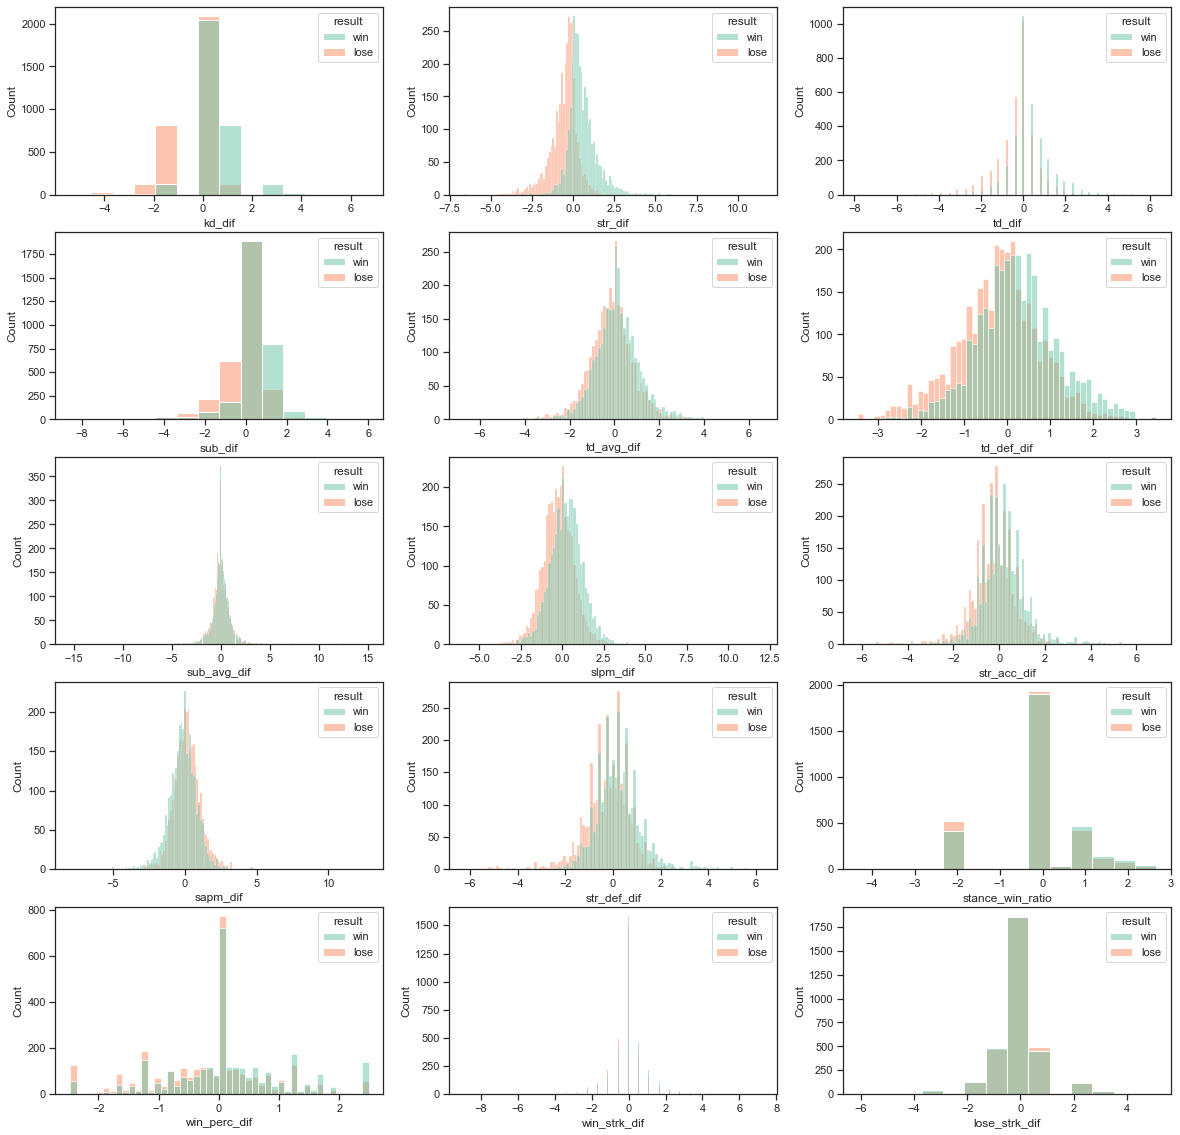

In [81]:
rows=5
cols=3
sns.set_palette("Set2")
fig, axs = plt.subplots(rows,cols,figsize = (20,20))

i = 0
for row in range(rows):
    for col in range(cols):
        sns.histplot(ax=axs[row,col], x=features[i], data=df, hue='result')
        i += 1

In [82]:
X = features # prediction model features
data = df.copy()
data['outlier'] = False

for feature in X:
    ucl = np.mean(df[feature]) + 3*np.std(df[feature])
    lcl = np.mean(df[feature]) - 3*np.std(df[feature])
    
    inlier_list = df.index[(df[feature] > ucl)|(df[feature] < lcl)]
    data.loc[inlier_list,'outlier'] = True
    print('1d Outliers at %s: %s' %(feature,len(inlier_list)))

data.head(3)       

1d Outliers at kd_dif: 55
1d Outliers at str_dif: 88
1d Outliers at td_dif: 108
1d Outliers at sub_dif: 116
1d Outliers at td_avg_dif: 79
1d Outliers at td_def_dif: 23
1d Outliers at sub_avg_dif: 92
1d Outliers at slpm_dif: 42
1d Outliers at str_acc_dif: 106
1d Outliers at sapm_dif: 63
1d Outliers at str_def_dif: 117
1d Outliers at stance_win_ratio: 8
1d Outliers at win_perc_dif: 0
1d Outliers at win_strk_dif: 115
1d Outliers at lose_strk_dif: 190


,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier
0,win,Max Holloway,Arnold Allen,2023-04-15,Featherweight,U-DEC,Unanimous,-0.001919,2.622430,0.02281,-0.000407,-0.460982,0.272249,0.0,2.420944,0.596833,1.217824,-0.166302,-1.881571,-0.660964,-5.568664,1.027652,True
1,win,Edson Barboza,Billy Quarantillo,2023-04-15,Featherweight,KO/TKO,Knee,1.344808,0.081276,0.02281,-0.000407,-0.623507,0.584052,-1.1,-2.411241,-1.136628,-1.058670,1.571399,0.011599,-0.289684,-0.554406,2.047075,False
2,lose,Dustin Jacoby,Azamat Murzakanov,2023-04-15,Light Heavyweight,U-DEC,Unanimous,-1.348646,-0.102865,0.02281,-0.000407,-0.186371,-0.801738,0.0,0.564831,-0.806445,0.572817,0.094354,-1.881571,-0.487700,-0.554406,1.027652,False


<AxesSubplot:xlabel='sub_avg_dif', ylabel='td_dif'>

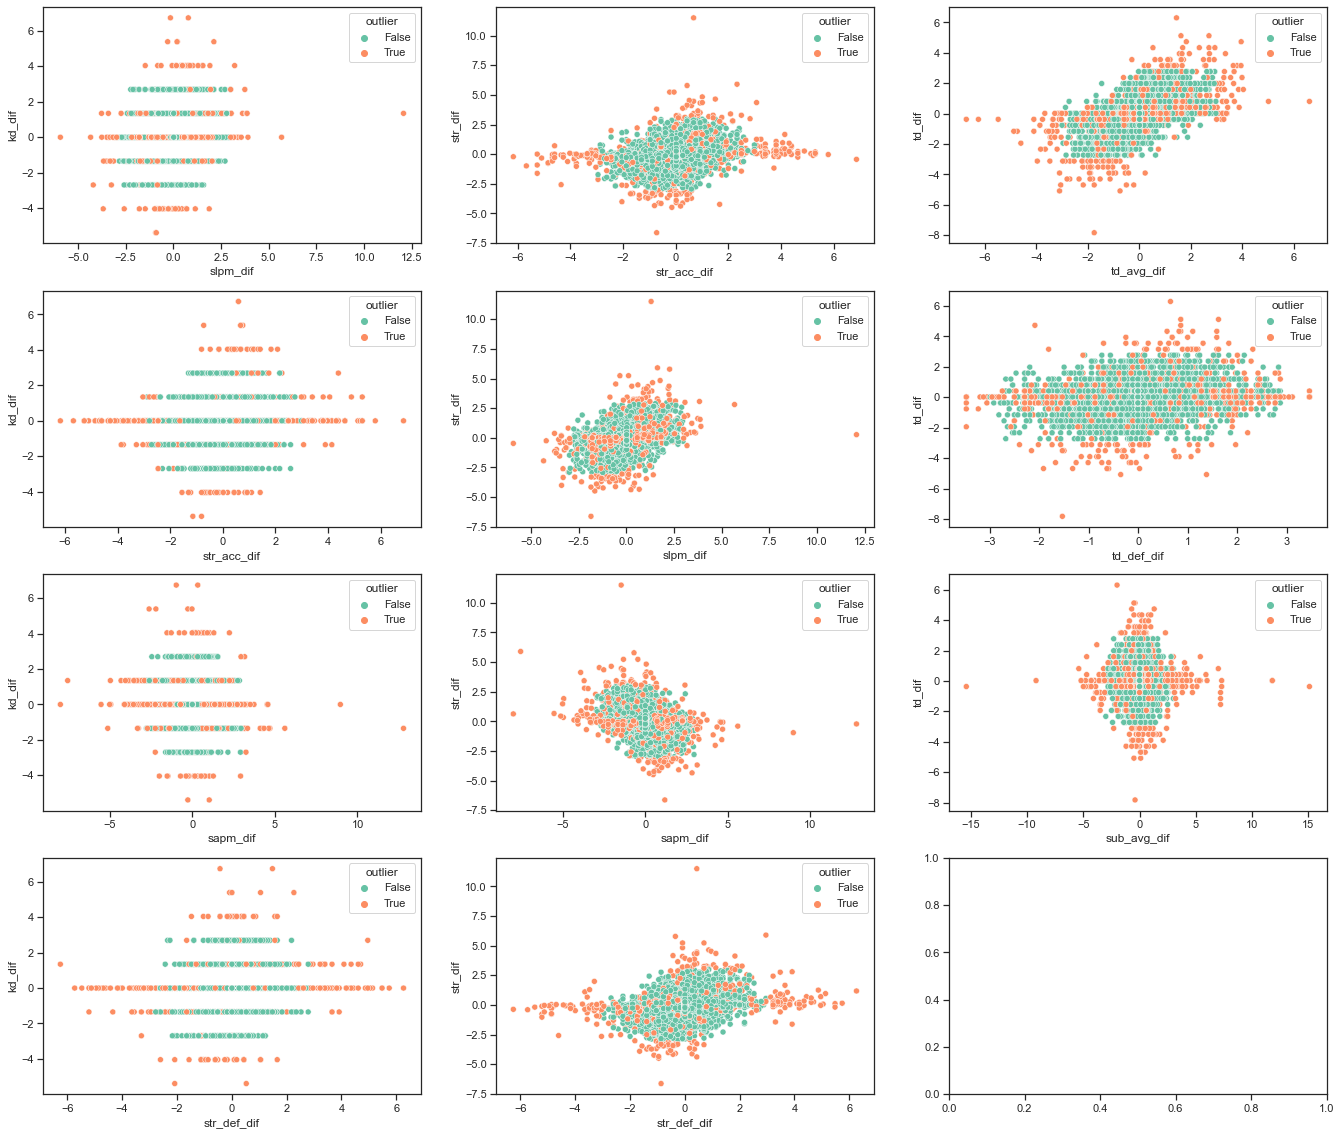

In [83]:
rows=4
cols=3
sns.set_palette("Set2")
fig, axs = plt.subplots(rows,cols,figsize = (23,20))

sns.scatterplot(ax=axs[0,0], x='slpm_dif', y='kd_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[1,0], x='str_acc_dif', y='kd_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[2,0], x='sapm_dif', y='kd_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[3,0], x='str_def_dif', y='kd_dif', data=data, hue='outlier')

sns.scatterplot(ax=axs[0,1], x='str_acc_dif', y='str_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[1,1], x='slpm_dif', y='str_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[2,1], x='sapm_dif', y='str_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[3,1], x='str_def_dif', y='str_dif', data=data, hue='outlier')

sns.scatterplot(ax=axs[0,2], x='td_avg_dif', y='td_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[1,2], x='td_def_dif', y='td_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[2,2], x='sub_avg_dif', y='td_dif', data=data, hue='outlier')

## Train Local Outlier Factor model: 
LOF model detect outliers based on data points density, a point with lower density will be counted as an outlier

In [84]:
X

Index(['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td_avg_dif', 'td_def_dif',
       'sub_avg_dif', 'slpm_dif', 'str_acc_dif', 'sapm_dif', 'str_def_dif',
       'stance_win_ratio', 'win_perc_dif', 'win_strk_dif', 'lose_strk_dif'],
      dtype='object')

In [85]:
lof = set_outlier_detection_model(X_columns=X, data=data, n=20, contemination=0.05)
lof

LocalOutlierFactor(contamination=0.05, n_jobs=-1)

In [86]:
data['lof_inlier'] = lof.fit_predict(data[X])
lof_outliers = data.index[data.lof_inlier == -1]
data['lof_outlier'] = False
data.loc[lof_outliers, 'lof_outlier'] = True
data = data.drop(['lof_inlier'], axis=1)
data.tail(3)

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier
6314,lose,Alberta Cerra Leon,Remco Pardoel,1994-03-11,Open Weight,SUB,Ezekiel Choke,-0.001919,-0.102865,-0.369809,-0.858406,0.009779,-0.004909,0.0,0.017435,0.019013,-0.00263,0.007469,-1.881571,0.007339,0.002734,0.00823,False,False
6315,lose,Robert Lucarelli,Orlando Wiet,1994-03-11,Open Weight,KO/TKO,Other,-0.001919,-0.213350,0.415429,0.857591,0.009779,-0.004909,0.0,0.017435,0.019013,-0.00263,0.007469,-1.881571,0.007339,0.002734,0.00823,False,False
6316,win,Johnny Rhodes,David Levicki,1994-03-11,Open Weight,KO/TKO,Punches,-0.001919,0.265418,0.415429,-0.000407,0.009779,-0.004909,0.0,0.017435,0.019013,-0.00263,0.007469,0.011599,0.007339,0.002734,0.00823,False,False


<AxesSubplot:xlabel='sub_avg_dif', ylabel='td_dif'>

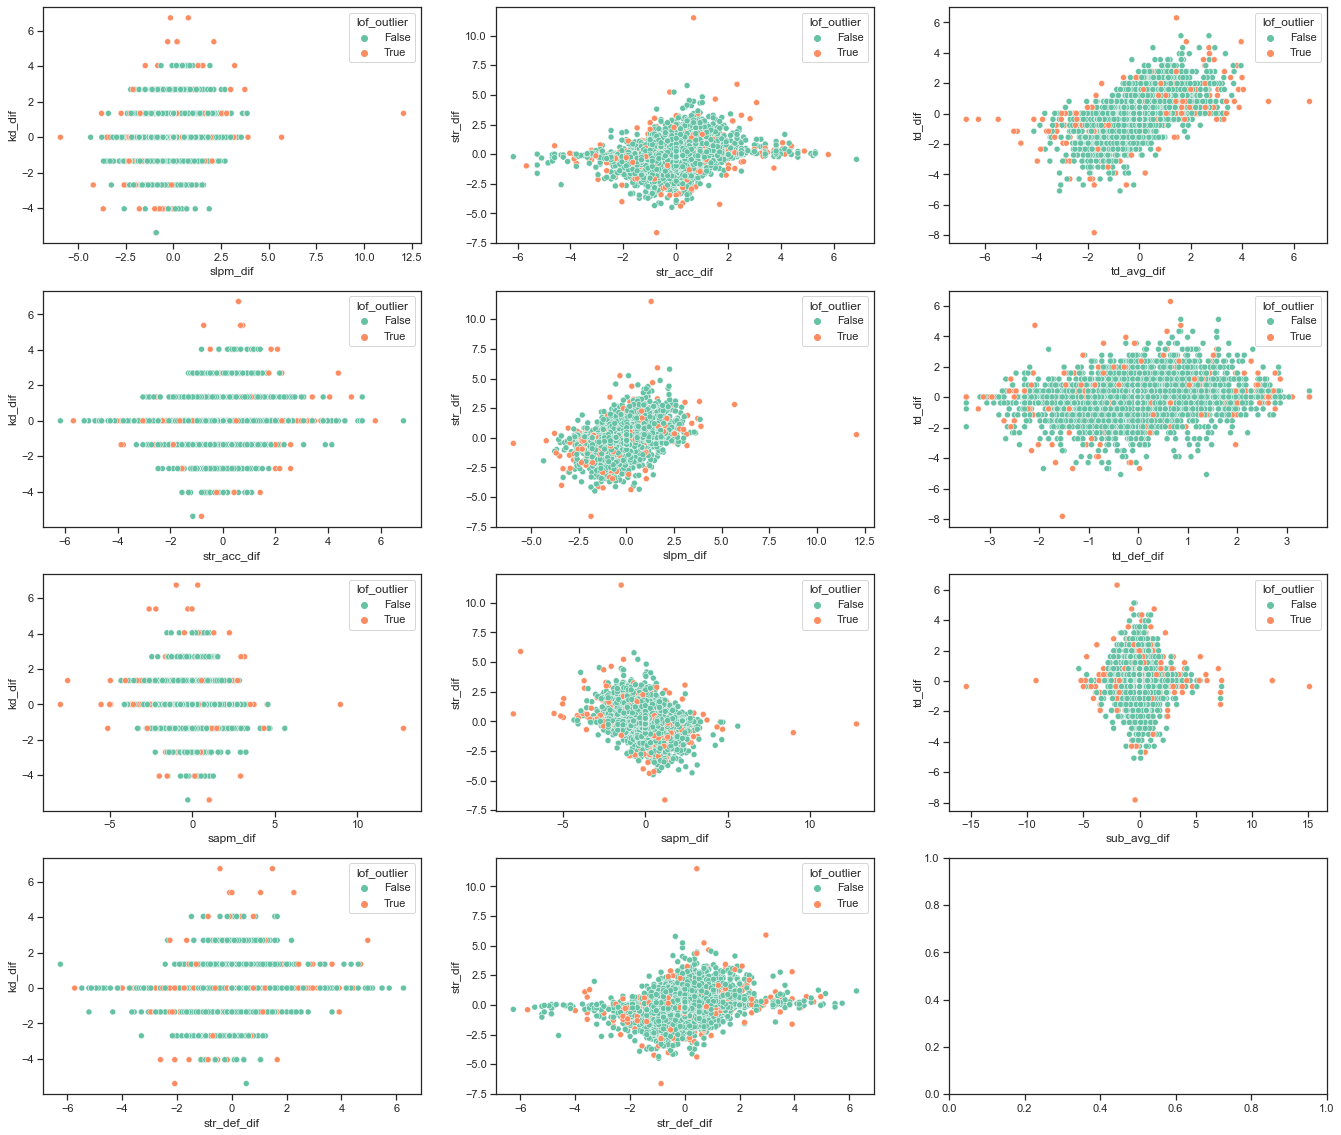

In [87]:
rows=4
cols=3
sns.set_palette("Set2")
fig, axs = plt.subplots(rows,cols,figsize = (23,20))

sns.scatterplot(ax=axs[0,0], x='slpm_dif', y='kd_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[1,0], x='str_acc_dif', y='kd_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[2,0], x='sapm_dif', y='kd_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[3,0], x='str_def_dif', y='kd_dif', data=data, hue='lof_outlier')

sns.scatterplot(ax=axs[0,1], x='str_acc_dif', y='str_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[1,1], x='slpm_dif', y='str_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[2,1], x='sapm_dif', y='str_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[3,1], x='str_def_dif', y='str_dif', data=data, hue='lof_outlier')

sns.scatterplot(ax=axs[0,2], x='td_avg_dif', y='td_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[1,2], x='td_def_dif', y='td_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[2,2], x='sub_avg_dif', y='td_dif', data=data, hue='lof_outlier')

In [89]:
try:
    data.to_csv('../data/data_features_outliers_detected.csv', index=None)
    print('../data/data_features_outliers_detected.csv saved.')
except:
    print('error occurs saving ../data/data_features_outliers_detected.csv - might be file in use.')

../data/data_features_outliers_detected.csv saved.
